In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [54]:
df = pd.read_csv('D:\Training Sets\Sprints\Heart_Disease\data\heart_disease_selected_features.csv')

x = df.drop('target', axis=1)
y = df['target']

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\ELGENDY\AppData\Local\Temp\ipykernel_2268\3534009129.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('D:\Training Sets\Sprints\Heart_Disease\data\heart_disease_selected_features.csv')


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=42, shuffle=True, stratify=y)

Logistic Regression Accuracy: 83.33%

Confusion Matrix:
[[30  2]
 [ 8 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.91      0.71      0.80        28

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



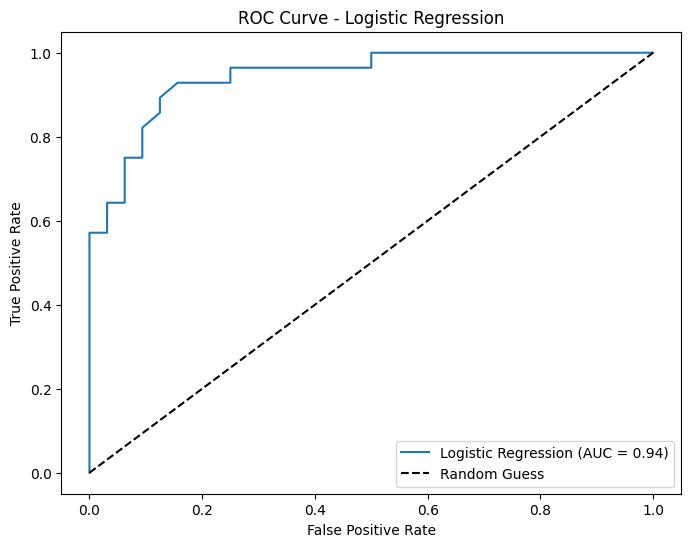

AUC Score: 0.94
______________________________________________________________

Decision Tree Accuracy: 81.67%

Confusion Matrix:
[[30  2]
 [ 9 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        32
           1       0.90      0.68      0.78        28

    accuracy                           0.82        60
   macro avg       0.84      0.81      0.81        60
weighted avg       0.83      0.82      0.81        60



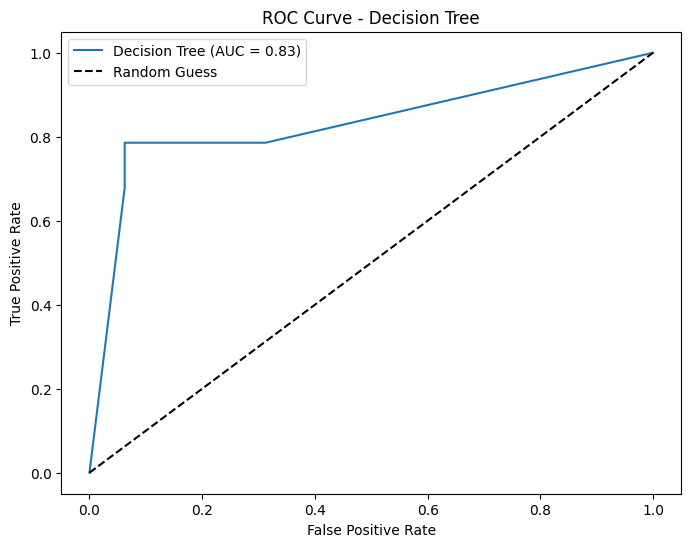

AUC Score: 0.83
______________________________________________________________

SVC Accuracy: 83.33%

Confusion Matrix:
[[30  2]
 [ 8 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.91      0.71      0.80        28

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



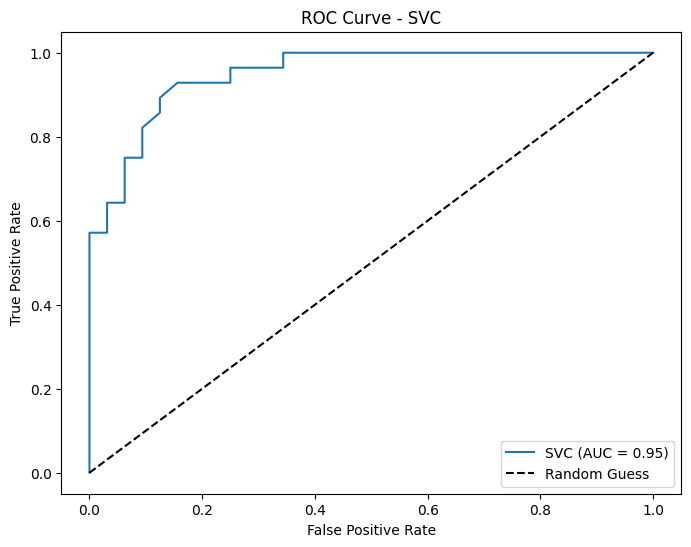

AUC Score: 0.95
______________________________________________________________

Random Forest Accuracy: 78.33%

Confusion Matrix:
[[29  3]
 [10 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        32
           1       0.86      0.64      0.73        28

    accuracy                           0.78        60
   macro avg       0.80      0.77      0.78        60
weighted avg       0.80      0.78      0.78        60



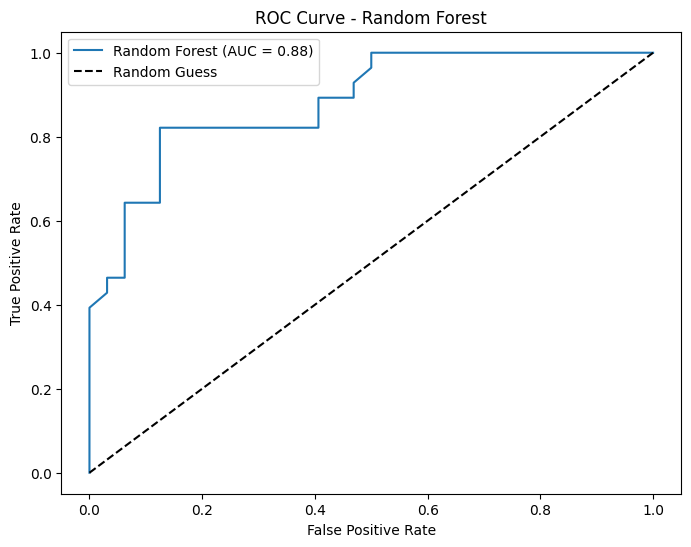

AUC Score: 0.88
______________________________________________________________



In [56]:
def evaluate_model(model, x_train, x_test, y_train, y_test, model_name="Model"):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print(f"{model_name} Accuracy: {(accuracy*100):.2f}%")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend()
        plt.show()
        print(f"AUC Score: {auc_score:.2f}")

        print("______________________________________________________________\n") 

# Usage:
evaluate_model(LogisticRegression(), x_train, x_test, y_train, y_test, "Logistic Regression")
evaluate_model(DecisionTreeClassifier(), x_train, x_test, y_train, y_test, "Decision Tree")
evaluate_model(SVC(probability=True, kernel="linear" ), x_train, x_test, y_train, y_test, "SVC")
evaluate_model(RandomForestClassifier(random_state=42), x_train, x_test, y_train, y_test, "Random Forest")

C:\Users\ELGENDY\AppData\Local\Temp\ipykernel_2268\555344868.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette=['#0e235e', '#750a0a', '#1c4c09', '#683d06'])


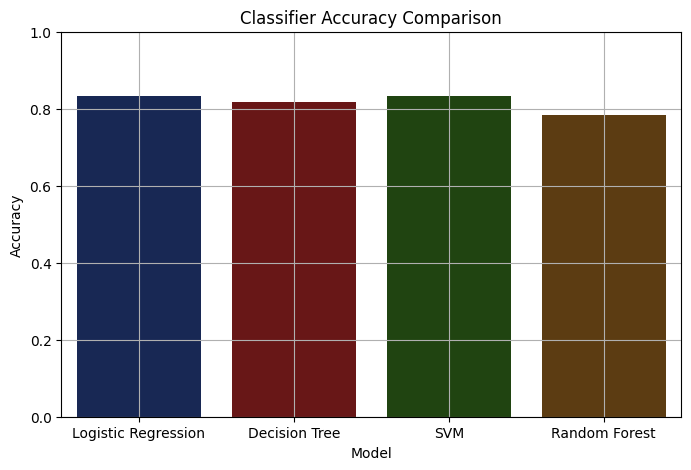

In [57]:
# Performance comparison
models = ['Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest']

# Collect accuracy scores from your evaluate_model runs
# You can do this by modifying evaluate_model to return accuracy, or manually as below:
logreg = LogisticRegression()
dtree = DecisionTreeClassifier()
svc = SVC(probability=True, kernel="linear")
rf = RandomForestClassifier(random_state=42)

logreg.fit(x_train, y_train)
dtree.fit(x_train, y_train)
svc.fit(x_train, y_train)
rf.fit(x_train, y_train)

acc_logreg = accuracy_score(y_test, logreg.predict(x_test))
acc_dtree = accuracy_score(y_test, dtree.predict(x_test))
acc_svc = accuracy_score(y_test, svc.predict(x_test))
acc_rf = accuracy_score(y_test, rf.predict(x_test))

accuracies = [acc_logreg, acc_dtree, acc_svc, acc_rf]


plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette=['#0e235e', '#750a0a', '#1c4c09', '#683d06'])
plt.ylim(0, 1.0)
plt.title("Classifier Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.grid(True)
plt.show()